In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from rich import print as rprint
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../datasets/train.csv')

In [4]:
df = df.drop(['id'], axis=1)

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [7]:
df.shape

(76518, 37)

In [8]:
[i for i in df.columns if df[i].isnull().sum() > 0]

[]

In [9]:
[i for i in df.columns if df[i].dtype == 'object']

['Target']

In [10]:
# Label encoding
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [11]:
X = df.drop(['Target'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
prob = []
correct = []

In [13]:
max_iter_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
train_accuracy = {}
test_accuracy = {}

In [14]:
# Logistic Regression
for max_iter in max_iter_list:
    model = LogisticRegression(max_iter=max_iter, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict_proba(X_train)
    prob.append(y_pred_train[np.arange(len(y_train)), y_train])
    correct.append(y_train == np.argmax(y_pred_train, axis=1))
    y_pred = model.predict(X_test)
    train_accuracy[max_iter] = accuracy_score(y_train, np.argmax(y_pred_train, axis=1))
    test_accuracy[max_iter] = accuracy_score(y_test, y_pred)
    rprint(f"Max Iter: {max_iter}, Train Accuracy: {train_accuracy[max_iter]}, Test Accuracy: {test_accuracy[max_iter]}")

Max Iter: 100, Train Accuracy: 0.7270722383768419, Test Accuracy: 0.7299398849973863

Max Iter: 200, Train Accuracy: 0.7672754598621231, Test Accuracy: 0.7702561421850497

Max Iter: 300, Train Accuracy: 0.7705100140490737, Test Accuracy: 0.7729351803450079

Max Iter: 400, Train Accuracy: 0.7732871565328193, Test Accuracy: 0.775810245687402

Max Iter: 500, Train Accuracy: 0.7818636259679158, Test Accuracy: 0.7873105070569786

Max Iter: 600, Train Accuracy: 0.78312150815173, Test Accuracy: 0.7887480397281756

Max Iter: 700, Train Accuracy: 0.7876466167870095, Test Accuracy: 0.7916231050705698

Max Iter: 800, Train Accuracy: 0.7885451040611625, Test Accuracy: 0.7935180345007841

Max Iter: 900, Train Accuracy: 0.7886104485901918, Test Accuracy: 0.7926032409827496

Max Iter: 1000, Train Accuracy: 0.7889535073675956, Test Accuracy: 0.7921458442237324

In [ ]:
max_test_accuracy = max(test_accuracy, key=test_accuracy.get)

In [15]:
prob = np.array(prob)
correct = np.array(correct)

In [16]:
prob = prob.T
correct = correct.T

In [17]:
mean = np.mean(prob, axis=1)
std = np.std(prob, axis=1)
varibility = std / mean

In [18]:
correctness = np.mean(correct, axis=1)

In [19]:
varibility.shape

(61214,)

In [20]:
correctness.shape

(61214,)

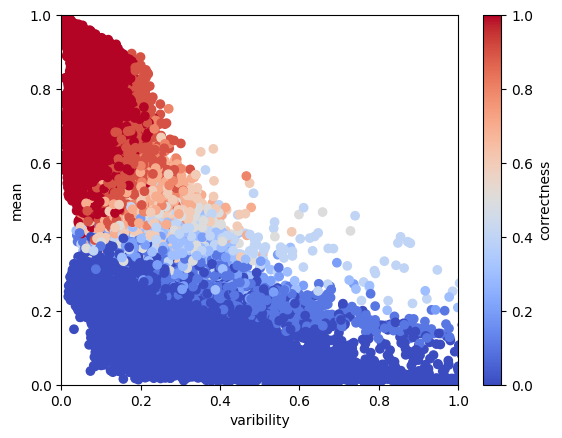

In [21]:
plt.figure()
plt.scatter(varibility, mean, c=correctness, cmap='coolwarm')
plt.colorbar(label = 'correctness')
plt.xlabel('varibility')
plt.ylabel('mean')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [22]:
correctness_min, correctness_max = np.min(correctness), np.max(correctness)

In [23]:
# pick range
correctness_range = [[min_i, min_i + 0.1] for min_i in np.arange(correctness_min, 1.1, 0.1)]
correctness_range

[[0.0, 0.1],
 [0.1, 0.2],
 [0.2, 0.30000000000000004],
 [0.30000000000000004, 0.4],
 [0.4, 0.5],
 [0.5, 0.6],
 [0.6000000000000001, 0.7000000000000001],
 [0.7000000000000001, 0.8],
 [0.8, 0.9],
 [0.9, 1.0],
 [1.0, 1.1]]

In [24]:
pick = []
for j in range(len(correctness_range)):
    pick.append([idx for idx,i in enumerate(correctness) if correctness_range[j][0] <= i < correctness_range[j][1]])

In [25]:
pick_train_x = []
pick_train_y = []
for i in pick:
    pick_train_x.append(X_train.iloc[i, :])
    pick_train_y.append(y_train.iloc[i])

In [26]:
def decrease_max_iter(index:int) -> int:
    base = 2000
    return max(100, base - index * 160)

In [27]:
model_list = []
for idx in range(len(pick_train_x)):
    model = LogisticRegression(max_iter=decrease_max_iter(idx), n_jobs=-1, random_state=42)
    print(f"Model {idx} is training", end="\r")
    if len(pick_train_x[idx]) == 0:
        print(f"Model {idx} is skipped     ")
        continue
    model.fit(pick_train_x[idx], pick_train_y[idx])
    model_list.append(model)
    print(f"Model {idx} is trained     ")

Model 0 is trained     
Model 1 is trained     
Model 2 is trained     
Model 3 is skipped     
Model 4 is trained     
Model 5 is trained     
Model 6 is trained     
Model 7 is skipped     
Model 8 is trained     
Model 9 is trained     
Model 10 is trained     


In [28]:
# Ensemble
from sklearn.ensemble import VotingClassifier

model_list = [(f"model_{idx}", model) for idx, model in enumerate(model_list)]
rprint(model_list)

vc = VotingClassifier(estimators=model_list, n_jobs=-1)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
vc_acc = accuracy_score(y_test, y_pred)
rprint(f"Ensemble Accuracy: {vc_acc}")

[
    ('model_0', LogisticRegression(max_iter=2000, n_jobs=-1, random_state=42)),
    ('model_1', LogisticRegression(max_iter=1840, n_jobs=-1, random_state=42)),
    ('model_2', LogisticRegression(max_iter=1680, n_jobs=-1, random_state=42)),
    ('model_3', LogisticRegression(max_iter=1360, n_jobs=-1, random_state=42)),
    ('model_4', LogisticRegression(max_iter=1200, n_jobs=-1, random_state=42)),
    ('model_5', LogisticRegression(max_iter=1040, n_jobs=-1, random_state=42)),
    ('model_6', LogisticRegression(max_iter=720, n_jobs=-1, random_state=42)),
    ('model_7', LogisticRegression(max_iter=560, n_jobs=-1, random_state=42)),
    ('model_8', LogisticRegression(max_iter=400, n_jobs=-1, random_state=42))
]

Ensemble Accuracy: 0.7969158389963408

In [33]:
rprint(f"提升 {((vc_acc / max_test_accuracy) - 1 ) * 100:.4f} %")

提升 0.4282 %

In [29]:
vc

VotingClassifier(estimators=[('model_0',
                              LogisticRegression(max_iter=2000, n_jobs=-1,
                                                 random_state=42)),
                             ('model_1',
                              LogisticRegression(max_iter=1840, n_jobs=-1,
                                                 random_state=42)),
                             ('model_2',
                              LogisticRegression(max_iter=1680, n_jobs=-1,
                                                 random_state=42)),
                             ('model_3',
                              LogisticRegression(max_iter=1360, n_jobs=-1,
                                                 random_state=42)),
                             ('model_4',
                              LogisticRegression(max_iter=1200, n_jobs=-1,
                                                 random_state=42)),
                             ('model_5',
                              LogisticRegression(max_iter=1040, n_jobs=-1,
                                                 random_state=42)),
                             ('model_6',
                              LogisticRegression(max_iter=720, n_jobs=-1,
                                                 random_state=42)),
                             ('model_7',
                              LogisticRegression(max_iter=560, n_jobs=-1,
                                                 random_state=42)),
                             ('model_8',
                              LogisticRegression(max_iter=400, n_jobs=-1,
                                                 random_state=42))],
                 n_jobs=-1)